In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import os

In [6]:
training_data_path = input("Enter the drive path of training data: ")

Enter the drive path of training data: /content/drive/Shareddrives/minneMUDAC2025/Data/combined_complete_df.csv


In [12]:
training_df = pd.read_csv(training_data_path).drop(columns=["Little ID", "Big ID", "Match ID 18Char"])
col = training_df.pop("match_length")
training_df.insert(0, "match_length", col)
training_df.head()

,match_length,Big Days Acceptance to Match,Big Days Interview to Acceptance,Big Days Interview to Match,Big Days Approved to Match,Days Big Assesment Uploaded to Match,Big Days Contact Created to Match,Big Days Enrollment to Match,Days Match Activation to Closure Meeting Date,Days Little Acceptance to Match Activation Date,...,positive,negative,anger,anticipation,disgust,fear,joy,sadness,surprise,trust
0,9.0,0,0,0,0,0,0,0,273,0,...,325,7,0,333,3,24,164,10,90,261
1,46.1,0,0,0,1,0,0,0,0,0,...,2369,441,271,2316,265,340,1959,1014,1265,1377
2,6.2,0,0,0,0,0,0,0,190,0,...,73,25,5,75,9,27,47,9,36,64
3,85.6,0,0,0,9,0,0,0,0,0,...,14888,578,1501,11777,281,2126,7859,388,2959,11632
4,28.3,0,0,0,32,0,0,0,0,0,...,1279,226,62,1418,13,440,1082,139,654,1202


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
correlation_mat = training_df.corr().round(2)
print(correlation_mat)


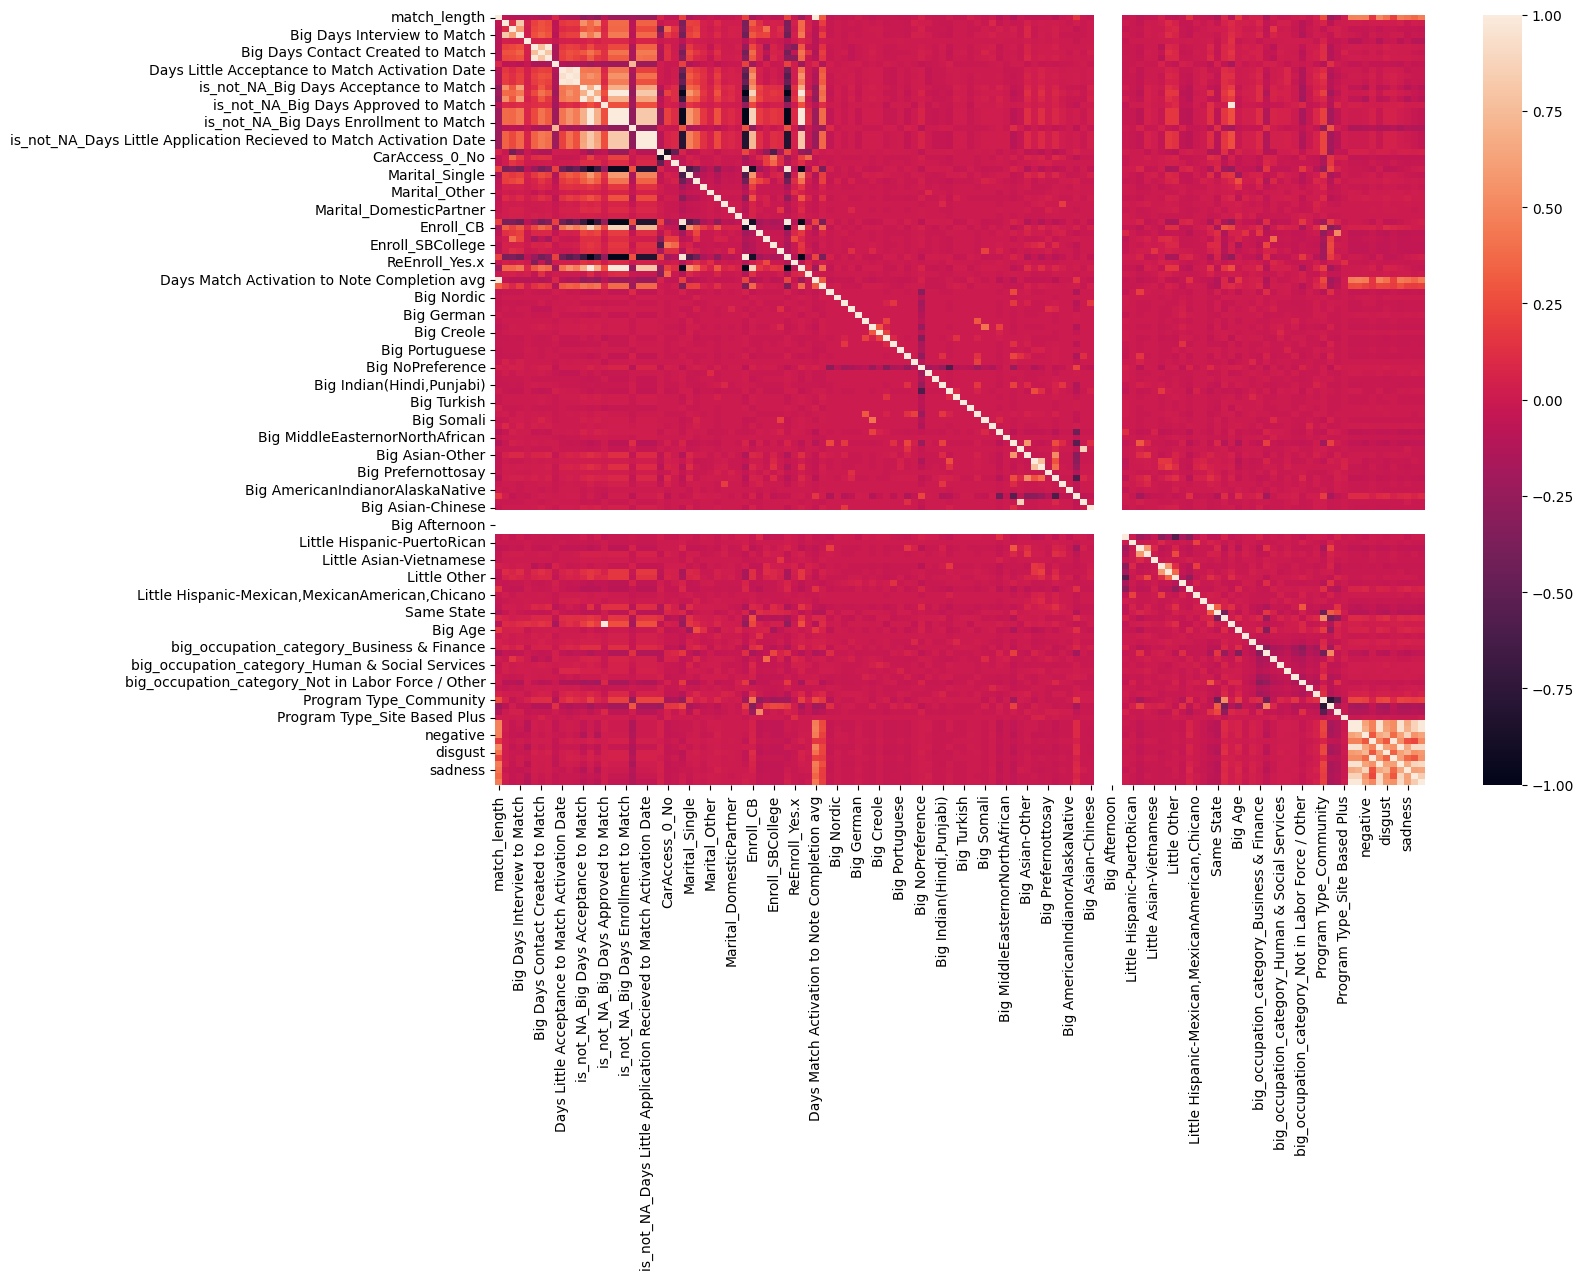

In [16]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat)
plt.show()

In [17]:
correlation_mat.index

Index(['match_length', 'Big Days Acceptance to Match',
       'Big Days Interview to Acceptance', 'Big Days Interview to Match',
       'Big Days Approved to Match', 'Days Big Assesment Uploaded to Match',
       'Big Days Contact Created to Match', 'Big Days Enrollment to Match',
       'Days Match Activation to Closure Meeting Date',
       'Days Little Acceptance to Match Activation Date',
       ...
       'positive', 'negative', 'anger', 'anticipation', 'disgust', 'fear',
       'joy', 'sadness', 'surprise', 'trust'],
      dtype='object', length=132)

In [19]:
from sklearn.linear_model import Lasso, Ridge

In [20]:
x_train = training_df.drop(columns=["match_length"])
y_train = training_df["match_length"]

In [22]:
lasso_model_alpha0p5 = Lasso(alpha=0.5)
lasso_model_alpha0p5.fit(x_train, y_train)

print(f"Lasso (alpha 0.5): {lasso_model_alpha0p5.coef_[:]}")

Lasso (alpha 0.5): [ 1.53771354e-04 -0.00000000e+00 -1.86992165e-04  3.67111944e-03
 -9.80398154e-04  5.48349098e-04  6.97005192e-04  8.90817696e-05
  1.94563111e-04  9.85561947e-04 -1.29746898e-03 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  8.00986740e-02  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00

In [25]:
import numpy as np

In [28]:
coefficients = lasso_model_alpha0p5.coef_
non_zero_coefficients = coefficients[np.abs(coefficients) > 1e-10] # Adjust tolerance as needed
non_zero_indices = np.where(np.abs(coefficients) > 1e-10)[0]

print("Non-zero coefficients:")
for coef, index in zip(non_zero_coefficients, non_zero_indices):
  print(f"Feature {x_train.columns[index]}: {coef}")

Non-zero coefficients:
Feature Big Days Acceptance to Match: 0.00015377135395044613
Feature Big Days Interview to Match: -0.00018699216456209735
Feature Big Days Approved to Match: 0.0036711194401410478
Feature Days Big Assesment Uploaded to Match: -0.0009803981543381325
Feature Big Days Contact Created to Match: 0.0005483490980126884
Feature Big Days Enrollment to Match: 0.0006970051918437729
Feature Days Match Activation to Closure Meeting Date: 8.908176956446098e-05
Feature Days Little Acceptance to Match Activation Date: 0.00019456311071497443
Feature Days Little Application Recieved to Match Activation Date: 0.000985561946923029
Feature Days Little Interview to Match Activation Date: -0.001297468977650514
Feature Days Match Activation to Note Completion avg: 0.08009867397093985
Feature Big Age: 0.0008913839229329851
Feature net_sentiment: -0.00025382536419372927
Feature negative: 0.001863752084641724
Feature anger: -0.0002138401703103482
Feature anticipation: 0.0006013215530051377

In [30]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the training set
y_pred_train = lasso_model_alpha0p5.predict(x_train)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)


print(f"Training MSE: {mse_train}")
print(f"Training RMSE: {rmse_train}")
print(f"Training R^2: {r2_train}")

Training MSE: 17.60638743793943
Training RMSE: 4.195996596511898
Training R^2: 0.9545972177837043


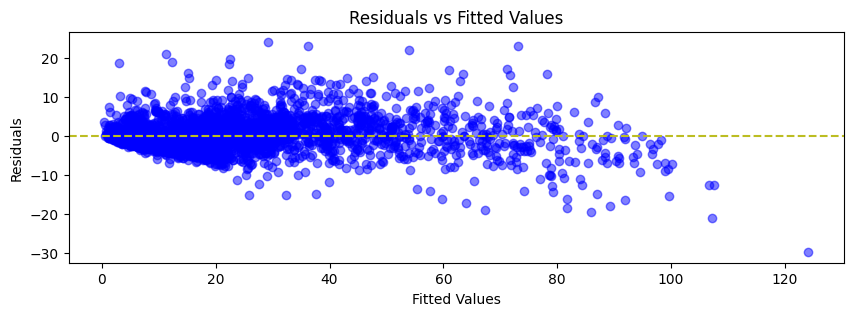

In [31]:
# Compute residuals
residuals = y_train - y_pred_train # Use y_train and y_pred_train

# 1. Residuals vs Fitted values plot
plt.figure(figsize=(10, 3))
plt.scatter(y_pred_train, residuals, color='blue', alpha=0.5) #use y_pred_train
plt.axhline(0, color='tab:olive', linestyle='--')
plt.title('Residuals vs Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

<Figure size 1000x600 with 0 Axes>

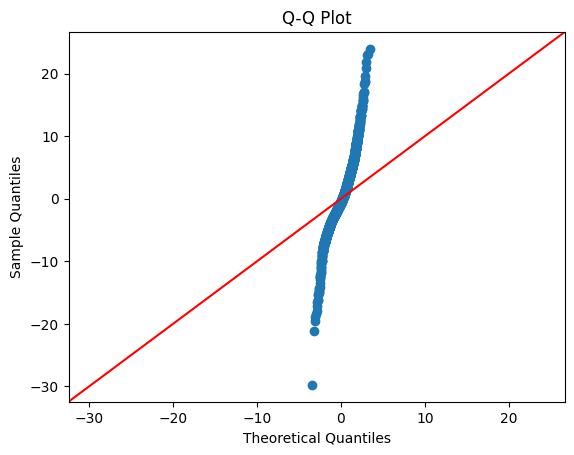

In [32]:
import statsmodels.api as sm

plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot')
plt.show()